# Weather SVR GUI

In [1]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sns


# Load the dataset
def load_dataset():
    file_path = filedialog.askopenfilename(title="Select Dataset")
    if file_path:
        df = pd.read_csv(file_path)
        return df
    else:
        return None


# Preprocess the dataset
def preprocess_dataset(df):
    df = df.iloc[:, 0:11]
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
    df = df.drop(columns=['DATE', 'BASEL_temp_min', 'BASEL_temp_max', 'BASEL_precipitation'])
    encoded_df = pd.get_dummies(df, columns=['MONTH'], prefix='MONTH')
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(encoded_df)
    scaled_df = pd.DataFrame(scaled_data, columns=encoded_df.columns)
    X = scaled_df.drop(columns=['BASEL_temp_mean'])
    y = scaled_df['BASEL_temp_mean']
    return X, y


# Train the SVR model
def train_svr(X_train, y_train):
    svr = SVR(kernel='linear', C=100)
    svr.fit(X_train, y_train)
    return svr


# Evaluate the SVR model
def evaluate_svr(svr,X_train,y_train, X_test, y_test,X,y):
    y_pred = svr.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    svr_cross_val_score = cross_val_score(svr, X, y, cv=5).mean()
    r2 = r2_score(y_test, y_pred)
    svr_train = svr.score(X_train, y_train)
    svr_test = svr.score(X_test, y_test)
    return rmse, r2,svr_cross_val_score,svr_train,svr_test


# GUI
class WeatherPredictionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Weather Prediction App svm")

        self.df = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.svr = None

        self.load_button = tk.Button(self.root, text="Load Dataset", command=self.load_dataset)
        self.load_button.pack(pady=10)

        self.train_button = tk.Button(self.root, text="Train Model", command=self.train_model)
        self.train_button.pack(pady=10)

        self.evaluate_button = tk.Button(self.root, text="Evaluate Model", command=self.evaluate_model)
        self.evaluate_button.pack(pady=10)

        self.result_label = tk.Label(self.root, text="")
        self.result_label.pack(pady=10)

        self.plot_frame = tk.Frame(self.root)
        self.plot_frame.pack(pady=10)

    def load_dataset(self):
        self.df = load_dataset()
        if self.df is not None:
            self.result_label.config(text="Dataset loaded successfully")
        else:
            self.result_label.config(text="Failed to load dataset")

    def train_model(self):
        if self.df is not None:
            X, y = preprocess_dataset(self.df)
            self.X = X
            self.y = y
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2,
                                                                                    random_state=42)
            self.svr = train_svr(self.X_train, self.y_train)
            self.result_label.config(text="Model trained successfully")
        else:
            self.result_label.config(text="Please load dataset first")

    def evaluate_model(self):
        if self.svr is not None and self.X_test is not None and self.y_test is not None:
            rmse, r2 ,svr_cross_val_score,svr_train,svr_test = evaluate_svr(self.svr,self.X_train,self.y_train,self.X_test, self.y_test,self.X,self.y)
            self.result_label.config(text=f"training score:{svr_train:.2f},testing score:{svr_test:.2f},RMSE: {rmse:.2f}, R2 Score: {r2:.2f},svr_cross_val_score:{svr_cross_val_score:.2f}")
            self.plot_results()
        else:
            self.result_label.config(text="Please train model first")

    def plot_results(self):
        if self.svr is not None and self.X_test is not None:
            y_pred = self.svr.predict(self.X_test)
            plt.figure(figsize=(8, 6))
            plt.scatter(self.y_test, y_pred, color='blue', label='SVR Predictions')
            plt.plot([self.y_test.min(), self.y_test.max()], [self.y_test.min(), self.y_test.max()], color='red',
                     linestyle='--', label='Perfect Predictions')
            plt.title('SVR Predictions vs Actual Values')
            plt.xlabel('Actual Values')
            plt.ylabel('Predicted Values')
            plt.legend()
            plt.grid(True)
            canvas = FigureCanvasTkAgg(plt.gcf(), master=self.plot_frame)
            canvas.draw()
            canvas.get_tk_widget().pack()
        else:
            self.result_label.config(text="Please train model first")


root = tk.Tk()
app = WeatherPredictionApp(root)
root.mainloop()

# Weather Decision tree regressor GUI

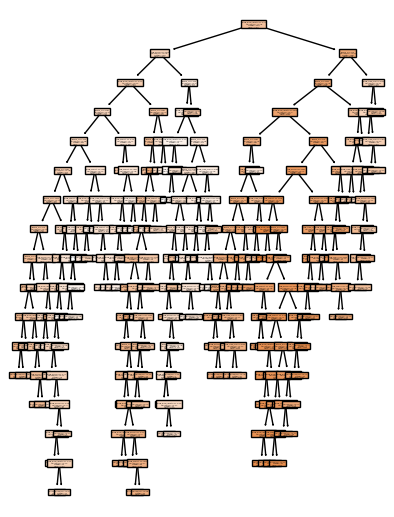

In [6]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sns


# Load the dataset
def load_dataset():
    file_path = filedialog.askopenfilename(title="Select Dataset")
    if file_path:
        df = pd.read_csv(file_path)
        return df
    else:
        return None


# Preprocess the dataset
def preprocess_dataset(df):
    df = df.iloc[:, 0:11]
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
    df = df.drop(columns=['DATE', 'BASEL_temp_min', 'BASEL_temp_max', 'BASEL_precipitation'])
    encoded_df = pd.get_dummies(df, columns=['MONTH'], prefix='MONTH')
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(encoded_df)
    scaled_df = pd.DataFrame(scaled_data, columns=encoded_df.columns)
    X = scaled_df.drop(columns=['BASEL_temp_mean'])
    y = scaled_df['BASEL_temp_mean']
    return X, y


# Train the dt model
def train_dt(X_train, y_train):
    tree_reg = DecisionTreeRegressor(min_samples_split=40)
    tree_reg.fit(X_train, y_train)
    return tree_reg


# Evaluate the dt model
def evaluate_dt(tree_reg,X_train,y_train,X_test, y_test):
    tree_reg_y_pred = tree_reg.predict(X_test)
    tree_reg_train = tree_reg.score(X_train, y_train)
    tree_reg_test = tree_reg.score(X_test, y_test)
    tree_mse = mean_squared_error(y_test, tree_reg_y_pred)
    tree_r2 = r2_score(y_test, tree_reg_y_pred)
    return tree_mse, tree_r2,tree_reg_train,tree_reg_test


# GUI
class WeatherPredictionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Weather Prediction App dt")

        self.df = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.tree_reg = None

        self.load_button = tk.Button(self.root, text="Load Dataset", command=self.load_dataset)
        self.load_button.pack(pady=10)

        self.train_button = tk.Button(self.root, text="Train Model", command=self.train_model)
        self.train_button.pack(pady=10)

        self.evaluate_button = tk.Button(self.root, text="Evaluate Model", command=self.evaluate_model)
        self.evaluate_button.pack(pady=10)

        self.result_label = tk.Label(self.root, text="")
        self.result_label.pack(pady=10)

        self.plot_frame = tk.Frame(self.root)
        self.plot_frame.pack(pady=10)

    def load_dataset(self):
        self.df = load_dataset()
        if self.df is not None:
            self.result_label.config(text="Dataset loaded successfully")
        else:
            self.result_label.config(text="Failed to load dataset")

    def train_model(self):
        if self.df is not None:
            X, y = preprocess_dataset(self.df)
            self.X = X
            self.y = y
            
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2,
                                                                                    random_state=42)
            self.tree_reg = train_dt(self.X_train, self.y_train)
            self.result_label.config(text="Model trained successfully")
        else:
            self.result_label.config(text="Please load dataset first")

    def evaluate_model(self):
        if self.tree_reg is not None and self.X_test is not None and self.y_test is not None:
            tree_reg_train,tree_reg_test,tree_mse, tree_r2 = evaluate_dt(self.tree_reg,self.X_train,self.y_train,self.X_test, self.y_test)
            self.result_label.config(text=f"testing score:{tree_reg_test:.2f},tree_mse: {tree_mse:.2f}, tree_r2 Score: {tree_r2:.2f}")
            self.plot_results()
        else:
            self.result_label.config(text="Please train model first")


    def plot_results(self):
        if self.tree_reg is not None and self.X_test is not None:
            plt.figure(figsize=(20,10))
            # Convert the column index to a list
            feature_names_list = self.X.columns.tolist()
            plot_tree(self.tree_reg, filled=True, feature_names=feature_names_list)
            canvas = FigureCanvasTkAgg(plt.gcf(), master=self.plot_frame)
            canvas.draw()
            canvas.get_tk_widget().pack()
        else:
            self.result_label.config(text="Please train model first")


root = tk.Tk()
app = WeatherPredictionApp(root)
root.mainloop()

# BBQ SVC GUI

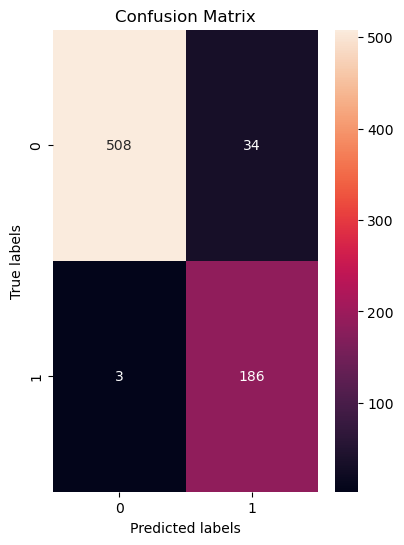

In [5]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt



# Load the dataset
def load_dataset():
    file_path = filedialog.askopenfilename(title="Select Dataset")
    if file_path:
        df = pd.read_csv(file_path)
        return df
    else:
        return None

# Preprocess the dataset
def preprocess_dataset(df_BBQ):
    weather_dataset = pd.read_csv('weather_prediction_dataset.csv')
    weather_dataset = weather_dataset.iloc[:, 0:11]
    df_BBQ = df_BBQ['BASEL_BBQ_weather']
    merged_df = pd.concat([weather_dataset, df_BBQ], axis = 1)
    merged_df = merged_df.drop(columns=['BASEL_pressure','DATE','BASEL_temp_min','BASEL_temp_max'])
    encoded_df = pd.get_dummies(merged_df, columns=['MONTH'], prefix='MONTH')
    return encoded_df

# Train the SVC model
def train_svc(X_train, y_train):
    svc = SVC(C=100, probability=True)
    svc.fit(X_train, y_train)
    return svc

# Evaluate the SVC model
def evaluate_svc(svc, X_test, y_test):
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, confusion

# GUI
class BBQClassificationApp:
    def __init__(self, root):
        self.root = root
        self.root.title("BBQ Weather Classification App svm")

        self.df = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.svc = None

        self.load_button = tk.Button(self.root, text="Load Dataset", command=self.load_dataset)
        self.load_button.pack(pady=10)

        self.train_button = tk.Button(self.root, text="Train Model", command=self.train_model)
        self.train_button.pack(pady=10)

        self.evaluate_button = tk.Button(self.root, text="Evaluate Model", command=self.evaluate_model)
        self.evaluate_button.pack(pady=10)

        self.result_label = tk.Label(self.root, text="")
        self.result_label.pack(pady=10)

        self.plot_frame = tk.Frame(self.root)
        self.plot_frame.pack(pady=10)

    def load_dataset(self):
        self.df = load_dataset()
        if self.df is not None:
            self.result_label.config(text="Dataset loaded successfully")
        else:
            self.result_label.config(text="Failed to load dataset")

    def train_model(self):
        if self.df is not None:
            encoded_df = preprocess_dataset(self.df)
            X = encoded_df.drop(columns=['BASEL_BBQ_weather'])
            y = encoded_df['BASEL_BBQ_weather'].astype(int)
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            self.svc = train_svc(self.X_train, self.y_train)
            self.result_label.config(text="Model trained successfully")
        else:
            self.result_label.config(text="Please load dataset first")

    def evaluate_model(self):
        if self.svc is not None and self.X_test is not None and self.y_test is not None:
            accuracy, precision, recall, f1, confusion = evaluate_svc(self.svc, self.X_test, self.y_test)
            self.result_label.config(text=f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
            self.plot_confusion_matrix(confusion)
        else:
            self.result_label.config(text="Please train model first")

    def plot_confusion_matrix(self, confusion_matrix):
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix, annot=True, fmt='d')
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        canvas = FigureCanvasTkAgg(plt.gcf(), master=self.plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack()

root = tk.Tk()
app = BBQClassificationApp(root)
root.mainloop()

# BBQ Decision tree classifier GUI

In [ ]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt



# Load the dataset
def load_dataset():
    file_path = filedialog.askopenfilename(title="Select Dataset")
    if file_path:
        df = pd.read_csv(file_path)
        return df
    else:
        return None

# Preprocess the dataset
def preprocess_dataset(df_BBQ):
    weather_dataset = pd.read_csv('weather_prediction_dataset.csv')
    weather_dataset = weather_dataset.iloc[:, 0:11]
    df_BBQ = df_BBQ['BASEL_BBQ_weather']
    merged_df = pd.concat([weather_dataset, df_BBQ], axis = 1)
    merged_df = merged_df.drop(columns=['BASEL_pressure','DATE','BASEL_temp_min','BASEL_temp_max'])
    encoded_df = pd.get_dummies(merged_df, columns=['MONTH'], prefix='MONTH')
    return encoded_df

# Train the dt model
def train_dt(X_train, y_train):
    tree_class = DecisionTreeClassifier(min_samples_split=40)
    tree_class.fit(X_train, y_train)
    return tree_class

# Evaluate the dt model
def evaluate_dt(tree_class, X_test, y_test):
    tree_class_y_pred = tree_class.predict(X_test)
    tree_confusion_matrix = confusion_matrix(y_test, tree_class_y_pred,labels=[0,1])
    tree_recall_score = recall_score(y_test, tree_class_y_pred)
    tree_precision = precision_score(y_test, tree_class_y_pred)
    tree_f1 = f1_score(y_test, tree_class_y_pred)
    return tree_precision, tree_recall_score, tree_f1, tree_confusion_matrix

# GUI
class BBQClassificationApp:
    def __init__(self, root):
        self.root = root
        self.root.title("BBQ Weather Classification App dt")

        self.df = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.tree_class = None

        self.load_button = tk.Button(self.root, text="Load Dataset", command=self.load_dataset)
        self.load_button.pack(pady=10)

        self.train_button = tk.Button(self.root, text="Train Model", command=self.train_model)
        self.train_button.pack(pady=10)

        self.evaluate_button = tk.Button(self.root, text="Evaluate Model", command=self.evaluate_model)
        self.evaluate_button.pack(pady=10)

        self.result_label = tk.Label(self.root, text="")
        self.result_label.pack(pady=10)

        self.plot_frame = tk.Frame(self.root)
        self.plot_frame.pack(pady=10)

    def load_dataset(self):
        self.df = load_dataset()
        if self.df is not None:
            self.result_label.config(text="Dataset loaded successfully")
        else:
            self.result_label.config(text="Failed to load dataset")

    def train_model(self):
        if self.df is not None:
            encoded_df = preprocess_dataset(self.df)
            X = encoded_df.drop(columns=['BASEL_BBQ_weather'])
            y = encoded_df['BASEL_BBQ_weather'].astype(int)
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            self.tree_class = train_dt(self.X_train, self.y_train)
            self.result_label.config(text="Model trained successfully")
        else:
            self.result_label.config(text="Please load dataset first")

    def evaluate_model(self):
        if self.tree_class is not None and self.X_test is not None and self.y_test is not None:
            precision, recall, f1, confusion = evaluate_dt(self.tree_class, self.X_test, self.y_test)
            self.result_label.config(text=f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
            self.plot_confusion_matrix(confusion)
        else:
            self.result_label.config(text="Please train model first")

    def plot_confusion_matrix(self, confusion_matrix):
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix, annot=True, fmt='d')
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        canvas = FigureCanvasTkAgg(plt.gcf(), master=self.plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack()

root = tk.Tk()
app = BBQClassificationApp(root)
root.mainloop()